In [1]:
#Linear Regression Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random

pd.set_option('display.max_rows', None)

df = pd.read_csv('analysts_survey_1.1.csv')

In [2]:
#cleaning 

#drop 
df.dropna(axis=0, how="any", thresh=None, subset=['avg_sallary'], inplace=True)
df['avg_sallary'].isna().sum()

df = df[df['job_percentage'] == 'Full-time']
df['job_percentage'].isna().sum()

df = df[df['data_analyzing'] == 'Yes']
df['data_analyzing'].isna().sum()

df.drop(df[df['company'] == 'IDF'].index, inplace=True)

# drop the 1 na so i can use this field in the regression model
df.dropna(axis=0, how="any", thresh=None, subset=['course_taken'], inplace=True)
df['course_taken'].isna().sum()

df.dropna(axis=0, how="any", thresh=None, subset=['equity'], inplace=True)
df['equity'].isna().sum()

0

In [3]:
#preparing the data for the model - changing text values to numbers
df['gender'].replace(['Male', 'Female'], [0, 1], inplace=True)
df['data_science'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['using_sql'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['predictive_models'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['wages_decrease_covid19'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['fired_covid19'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['equity'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['manager'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['course_taken'].replace(['No', 'Yes'], [0, 1], inplace=True)

#required_statistic_knowledge
df['required_statistic_knowledge'].replace(['No', 'Little', 'Medium', 'High'], [0, 1, 2, 3], inplace=True)

# cleaning but anyway - wont be in the model since all values are the same : Yes 
df['data_analyzing'].replace(['Yes'], [1], inplace=True)

In [4]:
# analysts only
df_analysts = df[df['data_science'] == 0]
df_analysts.describe()

,analyst_id,gender,age,data_analyzing,data_science,min_sallary Range,max_sallary Range,avg_sallary,equity,experience_years,manager,course_taken,using_sql,required_statistic_knowledge,predictive_models,wages_decrease_covid19,fired_covid19
count,218.000000,218.000000,218.000000,218.0,218.0,218.000000,218.00000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,150.857798,0.344037,32.334862,1.0,0.0,18.522936,20.83945,19.844037,0.334862,4.302752,0.197248,0.197248,0.775229,1.362385,0.366972,0.110092,0.073394
std,88.035618,0.476146,4.828179,0.0,0.0,6.457370,6.63234,6.645985,0.473029,3.519543,0.398837,0.398837,0.418392,0.843439,0.483088,0.313724,0.261383
min,1.000000,0.000000,22.000000,1.0,0.0,13.000000,15.00000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,76.250000,0.000000,29.000000,1.0,0.0,13.000000,15.00000,14.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,151.000000,0.000000,31.000000,1.0,0.0,18.000000,20.00000,19.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,227.750000,1.000000,35.000000,1.0,0.0,23.000000,25.00000,24.000000,1.000000,5.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000
max,298.000000,1.000000,49.000000,1.0,0.0,40.000000,40.00000,40.000000,1.000000,20.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000


In [5]:
# reduce df to contain analysts who earn <= 30K 
df_analysts_30 = df[df['avg_sallary'] <= 30]
df_analysts_30.describe() #200

,analyst_id,gender,age,data_analyzing,data_science,min_sallary Range,max_sallary Range,avg_sallary,equity,experience_years,manager,course_taken,using_sql,required_statistic_knowledge,predictive_models,wages_decrease_covid19,fired_covid19
count,200.000000,200.000000,200.000000,200.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,153.105000,0.345000,32.200000,1.0,0.030000,16.740000,19.010000,18.010000,0.275000,3.955000,0.140000,0.215000,0.750000,1.345000,0.370000,0.110000,0.085000
std,87.536605,0.476561,5.006528,0.0,0.171015,3.829586,3.927726,3.927726,0.447635,3.473225,0.347858,0.411853,0.434099,0.848276,0.484016,0.313675,0.279582
min,1.000000,0.000000,22.000000,1.0,0.000000,13.000000,15.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,79.500000,0.000000,29.000000,1.0,0.000000,13.000000,15.000000,14.000000,0.000000,2.000000,0.000000,0.000000,0.750000,1.000000,0.000000,0.000000,0.000000
50%,154.500000,0.000000,31.000000,1.0,0.000000,15.000000,18.000000,17.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,228.500000,1.000000,35.000000,1.0,0.000000,18.000000,20.000000,19.000000,1.000000,5.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000
max,298.000000,1.000000,49.000000,1.0,1.000000,25.000000,28.000000,27.000000,1.000000,21.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000


In [6]:
#convert objects to float if needed
df_analysts_30['data_science'].astype(str).astype(float)
df_analysts_30['data_science'].dtypes

dtype('int64')

In [7]:
df_analysts_30.columns

Index(['analyst_id', 'gender', 'age', 'data_analyzing', 'analyst_type',
       'data_science', 'living_area', 'office_area', 'job_percentage',
       'sallary', 'min_sallary Range', 'max_sallary Range', 'avg_sallary',
       'equity', 'experience_years', 'manager', 'school_degree',
       'course_taken', 'course_name', 'visualization_tool', 'using_sql',
       'required_statistic_knowledge', 'predictive_models',
       'wages_decrease_covid19', 'fired_covid19', 'company', 'startup_size'],
      dtype='object')

In [29]:
# df for experience years and avg salary only
df_analysts_30_experience = df_analysts_30[['experience_years', 'avg_sallary']]
df_analysts_30_experience

,experience_years,avg_sallary
0,3.0,17.0
2,4.0,24.0
3,5.0,17.0
4,3.0,14.0
5,2.0,17.0
6,10.0,19.0
7,2.0,19.0
8,1.0,17.0
9,6.0,19.0
11,4.0,19.0


In [30]:
pearsoncorr = df_analysts_30_experience.corr(method='pearson') # calculate correlation coeficient- the correlation is high as expected
print(pearsoncorr)

pearsoncorr = df_analysts_30_experience.groupby(["experience_years"]).corr(method='pearson') # calculate correlation coeficient- the correlation is high as expected
print(pearsoncorr)

                  experience_years  avg_sallary
experience_years          1.000000     0.452011
avg_sallary               0.452011     1.000000
                              avg_sallary
experience_years                         
0.0              avg_sallary          1.0
1.0              avg_sallary          1.0
2.0              avg_sallary          1.0
3.0              avg_sallary          1.0
4.0              avg_sallary          1.0
5.0              avg_sallary          1.0
6.0              avg_sallary          1.0
7.0              avg_sallary          1.0
8.0              avg_sallary          1.0
9.0              avg_sallary          1.0
10.0             avg_sallary          1.0
11.0             avg_sallary          NaN
12.0             avg_sallary          NaN
13.0             avg_sallary          NaN
14.0             avg_sallary          NaN
15.0             avg_sallary          NaN
18.0             avg_sallary          NaN
20.0             avg_sallary          NaN
21.0            

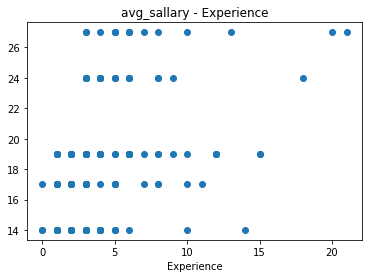

In [14]:
#scatter

plt.scatter(df_analysts_30['experience_years'], df_analysts_30['avg_sallary'])
plt.title('avg_sallary - Experience')
plt.xlabel('Experience')
plt.show()

# plt.scatter(df_analysts_30['gender'], df_analysts_30['avg_sallary'])
# plt.title('avg_sallary - gender')
# plt.xlabel('gender')
# plt.show()

In [ ]:
#Model
#Create X and Y data matrices
# in the model but has nulls : equity(8na), course_taken(1na),                              
# prediction: sallary(טווח) --> (avg_sallary), min_sallary Range, max_sallary Range, avg_sallary
# remove because of na: startup_size, 
# not relevant: analyst_id, 
# removed since not useful (text): analyst_type, living_area, office_area, school_degree, course_name, 
# visualization_tool(if there were nulls i could have used it in the model as yes/no), company
# startup_size - has nulls but also not usefull as not all companies are startups 
# all yes 'job_percentage' & data_analyzing

#predictive_models (rarely got yes)

In [ ]:
#linear regression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X = df_analysts_30[['gender', 'age','equity', 'experience_years', 'manager', 'course_taken', 'using_sql', 
'required_statistic_knowledge','wages_decrease_covid19', 'fired_covid19']]
Y = df_analysts_30['avg_sallary']

X_train, X_test, Y_train, Y_test = train_test_split(df_analysts_30[['gender', 'age',
'equity', 'experience_years', 'manager', 'course_taken', 'using_sql', 'required_statistic_knowledge',
'wages_decrease_covid19', 'fired_covid19']], 
df_analysts_30['avg_sallary'], test_size=0.20, random_state=42)

In [ ]:
X_train.shape, Y_train.shape

In [ ]:
X_test.shape, Y_test.shape

In [ ]:
#X

In [ ]:
X.dtypes

In [ ]:
X.isnull().sum()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Defines the regression model
model = linear_model.LinearRegression()
#Build training model
model.fit(X_train, Y_train)

In [ ]:
#Apply trained model to make prediction (on test set)
Y_pred = model.predict(X_test)

In [ ]:
#Prediction results
#Print model performance
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

In [ ]:
# [ 0.33473062(gender) -0.00909235(age) 3.78539133(equity)  
# 0.33928395(experience_years) 1.93093767(manager) -0.47794016(course_taken)  1.74799769(using_sql)  
# 0.29000148(required_statistic_knowledge) 0.12024388(wages_decrease_covid19) 
# -0.57272301(fired_covid19)]

In [ ]:
# multiply by mean to get the same scale
# means:
# df_analysts_30['gender'].mean() #0.345
# df_analysts_30['age'].mean() #32.2
# df_analysts_30['equity'].mean() #0.275
# df_analysts_30['experience_years'].mean() #3.955
# df_analysts_30['manager'].mean() #0.14
# df_analysts_30['course_taken'].mean() #0.215
# df_analysts_30['using_sql'].mean() #0.75
# df_analysts_30['required_statistic_knowledge'].mean() #1.345
# df_analysts_30['wages_decrease_covid19'].mean() #0.11
# df_analysts_30['fired_covid19'].mean() #0.085

#df_analysts_30['required_statistic_knowledge'] # 0-3


In [ ]:
#After multiplication

0.1154820639 #gender
-0.29277367 #age
1.04098261575 #equity
1.34186802225 #experience_years
0.2703312738 #manager
-0.1027571344 #course_taken
1.3109982675 #using_sql
0.3900519906 #required_statistic_knowledge
0.0132268268 #wages_decrease_covid19
-0.04868145585 #fired_covid19
